In [ ]:
seed_value= 123
import tensorflow as tf
import random as rn
import random
from tensorflow.keras.optimizers import SGD


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten ,ZeroPadding2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from scipy import ndimage

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,Adadelta, Adagrad
from tensorflow.keras import models
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from tensorflow.keras import activations
from tensorflow.keras import Model

from tensorflow.keras.layers import AvgPool2D, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.layers import Add, ReLU, Dense, concatenate

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add

from tensorflow.keras.applications import VGG16,VGG19

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from statistics import mean, stdev
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MODEL ARCHITECTURE

<img src="Modelpic.png">

In [ ]:
#only T2tra, ADC, Bval
data =pd.read_csv("/content/drive/Shareddrives/Prostate-X/2-Final-with-Ktrans.csv")

FileNotFoundError: ignored

In [ ]:
data.head(5)

In [ ]:
data.groupby('ggg').count()

In [ ]:
#Patients with more than 1 lesion
(data['ProxID'].value_counts())[:13]

#There are 12 patients with more than 1 lesion(1 patient with 3 lesions- 3*3MRI sequences=9, Similarly 11 patients with 2 lesions )

NameError: ignored

In [ ]:
t2_samples1 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/t2tra/X_train_ijk.npy')
t2_labels1 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/t2tra/Y_train_ijk.npy')

t2_samples2 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/adc/X_train_ijk.npy')
t2_labels2 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/adc/Y_train_ijk.npy')

t2_samples3 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/bval/X_train_ijk.npy')
t2_labels3 = np.load('/content/drive/MyDrive/Prostate-X/Train/numpy/ijk/bval/Y_train_ijk.npy')

In [ ]:
t2_samples1 = np.array(t2_samples1, dtype=np.float32, copy = True)
t2_samples2 = np.array(t2_samples2, dtype=np.float32, copy = True)
t2_samples3 = np.array(t2_samples3, dtype=np.float32, copy = True)

In [ ]:
t2_samples1 = t2_samples1[:115]
t2_labels1 = t2_labels1[:115]

In [ ]:
t2_samples3.shape

In [ ]:
t2_labels3.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_t2_train, x_t2_test, y_t2_train, y_t2_test = train_test_split(t2_samples1, t2_labels1, test_size=0.30, random_state=seed_value,shuffle=True, stratify=t2_labels1)

print("X_t2_train shape: ",x_t2_train.shape, "\nY_t2_train shape: ",y_t2_train.shape)
print("X_t2_test shape: ",x_t2_test.shape, "\nY_t2_test shape: ",y_t2_test.shape)


In [ ]:
from sklearn.model_selection import train_test_split
x_adc_train, x_adc_test, y_adc_train, y_adc_test = train_test_split(t2_samples2, t2_labels2, test_size=0.30, random_state=seed_value,shuffle=True, stratify=t2_labels2)

print("X_adc_train shape: ",x_adc_train.shape, "\nY_adc_train shape: ",y_adc_train.shape)
print("X_adc_test shape: ",x_adc_test.shape, "\nY_adc_test shape: ",y_adc_test.shape)


In [ ]:
from sklearn.model_selection import train_test_split
x_bval_train, x_bval_test, y_bval_train, y_bval_test = train_test_split(t2_samples3, t2_labels3, test_size=0.30, random_state=seed_value,shuffle=True, stratify=t2_labels3)

print("X_bval_train shape: ",x_bval_train.shape, "\nY_bval_train shape: ",y_bval_train.shape)
print("X_bval_test shape: ",x_bval_test.shape, "\nY_bval_test shape: ",y_bval_test.shape)


In [ ]:
unique, counts = np.unique(y_bval_train, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(y_adc_train, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(y_adc_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(y_t2_test, return_counts=True)
dict(zip(unique, counts))

## DATA AUGMENTATION ON TRAIN

In [ ]:
## T2

image1 = np.empty([80, 224, 224, 3])
image2 = np.empty([80, 224, 224, 3])


for i in range (0,len(x_t2_train)):
    T=x_t2_train[i]
    angles = [80.0, 170, -170.0, -80.0]
    angle = random.choice(angles)
    image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)# rotating in xy plane
    angle = random.choice(angles)
    image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)

In [ ]:
x_t2_train = np.concatenate((x_t2_train, image1, image2), axis=0)
y_t2_train = np.concatenate((y_t2_train, y_t2_train, y_t2_train), axis=0)

In [ ]:
## ADC

image1 = np.empty([80, 224, 224, 3])  # Shape of train
image2 = np.empty([80, 224, 224, 3])


for i in range (0,len(x_adc_train)):
    T=x_adc_train[i]
    angles = [80.0, 170, -170.0, -80.0]
    angle = random.choice(angles)
    image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
    angle = random.choice(angles)
    image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)

In [ ]:
x_adc_train = np.concatenate((x_adc_train, image1, image2), axis=0)
y_adc_train = np.concatenate((y_adc_train, y_adc_train, y_adc_train), axis=0)

In [ ]:
## BVal

image1 = np.empty([80, 224, 224, 3])
image2 = np.empty([80, 224, 224, 3])


for i in range (0,len(x_bval_train)):
    T=x_bval_train[i]
    angles = [80.0, 170, -170.0, -80.0]
    # pick angles at random
    angle = random.choice(angles)
    image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
    angle = random.choice(angles)
    image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)

In [ ]:
x_bval_train = np.concatenate((x_bval_train, image1, image2), axis=0)
y_bval_train = np.concatenate((y_bval_train, y_bval_train, y_bval_train), axis=0)

In [ ]:
np.array_equal(y_adc_train,y_bval_train)

In [ ]:
np.array_equal(y_t2_train,y_bval_train)

In [ ]:
# should be same for adc, bval and t2

print("X_adc_train shape: ",x_adc_train.shape, "\nY_adc_train shape: ",y_adc_train.shape)
print("X_adc_test shape: ",x_adc_test.shape, "\nY_adc_test shape: ",y_adc_test.shape)


In [ ]:
x_adc_train= (np.expand_dims(x_adc_train, axis = 4))
x_t2_train= (np.expand_dims(x_t2_train, axis = 4))
x_bval_train= (np.expand_dims(x_bval_train, axis = 4))

In [ ]:
x_adc_test= (np.expand_dims(x_adc_test, axis = 4))
x_t2_test= (np.expand_dims(x_t2_test, axis = 4))
x_bval_test= (np.expand_dims(x_bval_test, axis = 4))

In [ ]:
x_adc_train.shape

(240, 224, 224, 3, 1)

In [ ]:
x_bval_test.shape

(35, 224, 224, 3, 1)

In [ ]:
#Feature extraction for Train data

In [ ]:
def VGG16():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))

  model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(Conv2D(filters=256, kernel_size=(3,3),padding='same', activation='relu'))

  model.add(Conv2D(filters=256, kernel_size=(3,3),padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))

  model.add(Flatten(name='flatten'))

  model.add(Dense(256, activation='relu', name='fc1'))

  model.add(Dense(128, activation='relu', name='fc2'))

  model.add(Dense(5, activation='softmax', name='output'))

  return model

In [ ]:
model=VGG16()

model.summary()

Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
opt = SGD(learning_rate=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
model.fit_generator(x_adc_train,validation_data=x_adc_test,epochs=50,verbose=1).print(1)

NameError: ignored

In [ ]:
from pickle import dump

model = VGG19()
model = Model(inputs=model.inputs, outputs=model.output)
group_t2 = x_t2_train
features = model.predict(group_t2)
print(features.shape)
dump(features, open('group_t2.npy', 'wb'))

8/8 [==============================] - 14s 344ms/step
(240, 1000)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from pickle import dump
model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.output)
group_adc = x_adc_train
features = model.predict(group_adc)
print(features.shape)
dump(features, open('group_adc.npy', 'wb'))

NameError: ignored

In [ ]:
from pickle import dump
model = VGG19()
model = Model(inputs=model.inputs, outputs=model.output)
group_bval = x_bval_train
features = model.predict(group_bval)
print(features.shape)
dump(features, open('group_bval.npy', 'wb'))

8/8 [==============================] - 1s 148ms/step
(240, 1000)


In [ ]:
x_t2 = np.load("/content/group_t2.npy",allow_pickle=True)
x_adc = np.load('/content/group_adc.npy',allow_pickle=True)
x_bval = np.load('/content/group_bval.npy',allow_pickle=True)

In [ ]:
print(x_t2.shape,x_adc.shape,x_bval.shape)

(240, 1000) (240, 1000) (240, 1000)


In [ ]:
X_train = np.concatenate((x_t2, x_adc,x_bval), axis=1)
X_train.shape

(240, 3000)

In [ ]:
model = VGG19()
model = Model(inputs=model.inputs, outputs=model.output)
group_t2 = x_t2_test
features = model.predict(group_t2)
print(features.shape)
dump(features, open('group_t2_test.npy', 'wb'))

2/2 [==============================] - 1s 1s/step
(35, 1000)


In [ ]:
model = VGG19()
model = Model(inputs=model.inputs, outputs=model.output)
group_adc = x_adc_test
features = model.predict(group_adc)
print(features.shape)
dump(features, open('group_adc_test.npy', 'wb'))

2/2 [==============================] - 0s 173ms/step
(35, 1000)


In [ ]:
model = VGG19()
model = Model(inputs=model.inputs, outputs=model.output)
group_bval = x_bval_test
features = model.predict(group_bval)
print(features.shape)
dump(features, open('group_bval_test.npy', 'wb'))

2/2 [==============================] - 0s 173ms/step
(35, 1000)


In [ ]:
x_t2 = np.load('/content/group_t2_test.npy',allow_pickle=True)
x_adc = np.load('/content/group_adc_test.npy',allow_pickle=True)
x_bval = np.load('/content/group_bval_test.npy',allow_pickle=True)

In [ ]:
X_test = np.concatenate((x_t2, x_adc,x_bval), axis=1)
X_test.shape

(35, 3000)

## FINAL- TRAIN, TEST

In [ ]:
y_train = y_t2_train
y_test = y_adc_test


print("X_train shape: ",X_train.shape, "\nY_adc_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape, "\nY_adc_test shape: ",y_test.shape)


X_train shape:  (240, 3000) 
Y_adc_train shape:  (240,)
X_test shape:  (35, 3000) 
Y_adc_test shape:  (35,)


## PCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
#pca = KernelPCA(n_components=32,kernel='linear') #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’
pca = KernelPCA(n_components=32,kernel='poly')
pca.fit(X_train)
x_train = pca.transform(X_train)

In [ ]:
x_test = pca.transform(X_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)


(240, 32)
(35, 32)


## ORDINAL CLASS CLASSIFIER

In [ ]:
#Decision Tree/J48/C4.5

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier(random_state=seed_value)

In [ ]:
tuned_parameters = {'max_depth': np.arange(2,10),'min_samples_leaf': np.arange(5,30),"criterion":["gini","entropy"],"min_impurity_decrease":[1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1]}

inner_cv = StratifiedKFold(n_splits=10, shuffle=True,random_state=seed_value)

grid_tree = GridSearchCV(model,tuned_parameters, scoring='accuracy', n_jobs = -1)
grid_tree.fit(x_train,y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(grid_tree, x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

In [ ]:
nested_score

array([0.29166667, 0.45833333, 0.41666667, 0.33333333, 0.3125    ])

Using Nested CV with grid search,accuracy: 36.25% +/- 12.80%

The best hyper-parameters to get this accuracy is :-
 {'criterion': 'entropy', 'max_depth': 4, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 17}

The best decision tree classifier is :-
 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       min_impurity_decrease=1e-07, min_samples_leaf=17,
                       random_state=123)
Confusion Matrix: - 
 [[4 8 0 0 0]
 [5 8 0 0 0]
 [1 5 0 0 0]
 [1 1 0 0 0]
 [2 0 0 0 0]]
Classification Report: - 
               precision    recall  f1-score   support

           1       0.31      0.33      0.32        12
           2       0.36      0.62      0.46        13
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.34        35
   macro avg       0.13      0.19      0.16        35
weighted avg       0.24  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


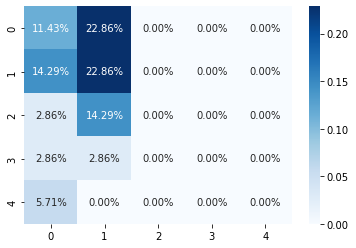

In [ ]:
# Mean Accuracy with +/- 2 std deviations
print("Using Nested CV with grid search,accuracy: {0:.2%} +/- {1:.2%}".format(nested_score.mean(), nested_score.std() * 2))
print()
print ("The best hyper-parameters to get this accuracy is :-\n", grid_tree.best_params_)
print()
print ("The best decision tree classifier is :-\n", grid_tree.best_estimator_)
y_pred = grid_tree.best_estimator_.predict(x_test)

#Goodness Measures confusion matrix and other measures like accuracy, precision,recall
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix: - \n",cm)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print("Classification Report: - \n",classification_report(y_test, y_pred))
print("kappa score : - \n",cohen_kappa_score(y_test, y_pred))
print("Test Accuracy: - \n",accuracy_score(y_test, y_pred))

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=5, learning_rate=0.1, n_estimators=100)

xg_clf.fit(x_train, y_train)

y_pred = xg_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix: - \n",cm)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print("Classification Report: - \n",classification_report(y_test, y_pred))
print("kappa score : - \n",cohen_kappa_score(y_test, y_pred))
print("Test Accuracy: - \n",accuracy_score(y_test, y_pred))

In [ ]:
import xgboost as xgb
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=30)),
])

x_train_preprocessed = pipeline.fit_transform(x_train)
x_test_preprocessed = pipeline.transform(x_test)

xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_jobs=-1)

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
}

random_search = RandomizedSearchCV(xg_clf, param_distributions=params, cv=3, n_iter=10, verbose=3, n_jobs=-1)
random_search.fit(x_train_preprocessed, y_train)

y_pred = random_search.predict(x_test_preprocessed)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy: 0.4


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
tuned_parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
tuned_parameters = {'max_depth': np.arange(2,10),'min_samples_leaf': np.arange(5,30),"criterion":["gini","entropy"],"min_impurity_decrease":[1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1]}

inner_cv = StratifiedKFold(n_splits=10, shuffle=True,random_state=seed_value)

grid_tree = RandomizedSearchCV(model,tuned_parameters, scoring='accuracy', n_jobs = -1,n_iter=50)
grid_tree.fit(x_train,y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(grid_tree, x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

In [ ]:
nested_score

array([0.41666667, 0.5       , 0.5       , 0.5       , 0.375     ])

Using Nested CV with grid search,accuracy: 46.25% +/- 14.53%

The best hyper-parameters to get this accuracy is :-
 {'min_samples_leaf': 5, 'min_impurity_decrease': 1e-06, 'max_depth': 8, 'criterion': 'entropy'}

The best decision tree classifier is :-
 RandomForestClassifier(criterion='entropy', max_depth=8,
                       min_impurity_decrease=1e-06, min_samples_leaf=5)
Confusion Matrix: - 
 [[8 4 0 0 0]
 [8 5 0 0 0]
 [1 5 0 0 0]
 [2 0 0 0 0]
 [2 0 0 0 0]]
Classification Report: - 
               precision    recall  f1-score   support

           1       0.38      0.67      0.48        12
           2       0.36      0.38      0.37        13
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.37        35
   macro avg       0.15      0.21      0.17        35
weighted avg       0.26      0.37      0.30        35

kappa score :

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


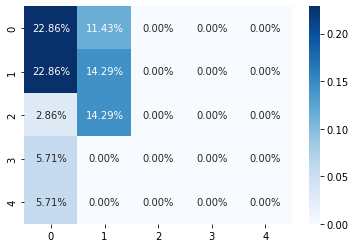

In [ ]:
# Mean Accuracy with +/- 2 std deviations
print("Using Nested CV with grid search,accuracy: {0:.2%} +/- {1:.2%}".format(nested_score.mean(), nested_score.std() * 2))
print()







print ("The best hyper-parameters to get this accuracy is :-\n", grid_tree.best_params_)
print()
print ("The best decision tree classifier is :-\n", grid_tree.best_estimator_)
y_pred = grid_tree.best_estimator_.predict(x_test)

#Goodness Measures confusion matrix and other measures like accuracy, precision,recall
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix: - \n",cm)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print("Classification Report: - \n",classification_report(y_test, y_pred))
print("kappa score : - \n",cohen_kappa_score(y_test, y_pred))
print("Test Accuracy: - \n",accuracy_score(y_test, y_pred))